### 3.1 Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\INKY\AppData\Local\Temp\ipykernel_15320\3636539039.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 3.2 Retrieving data

In [2]:
data = pd.read_csv("Datasets/BootstrappedAndNoOutlier.csv", encoding = "utf-8",sep=",")

In [3]:
data = data.drop('Unnamed: 0', axis = 1)
data

,Impressions,Comments,Shares,Likes,Caption,Hashtags
0,3920,9,5,162,"['import', 'data', 'visual', 'everi', 'financ'...","['financ', 'money', 'busi', 'invest', 'invest'..."
1,5394,7,14,224,"['best', 'data', 'scienc', 'project', 'idea', ...","['healthcar', 'health', 'covid', 'data', 'data..."
2,4021,11,1,131,"['learn', 'train', 'machin', 'learn', 'model',...","['data', 'datasci', 'dataanalysi', 'dataanalyt..."
3,4528,10,7,213,"['write', 'python', 'program', 'detect', 'whet...","['python', 'pythonprogram', 'pythonproject', '..."
4,2518,5,4,123,"['plot', 'annot', 'visual', 'data', 'consid', ...","['datavisu', 'datasci', 'data', 'dataanalyt', ..."
...,...,...,...,...,...,...
2238,4467,3,16,149,"['time', 'seri', 'analysi', 'mean', 'analyz', ...","['datasci', 'ai', 'thecleverprogramm', 'statis..."
2239,4115,6,3,191,"['time', 'seri', 'analysi', 'mean', 'analyz', ...","['timeseri', 'bigdata', 'data', 'datasci', 'ti..."
2240,2621,5,1,76,"['best', 'data', 'scienc', 'undertak', 'idea',...","['amankharw', 'pythonproject', 'datascientist'..."
2241,5055,7,11,159,"['varianc', 'covari', 'correl', 'statist', 'me...","['data', 'statist', 'ai', 'thecleverprogramm',..."


### 3.3 Adding Caption_Length column 

In [4]:
data['Caption_Length'] = data['Caption'].apply(len)
temp = data
data = data.drop(columns=['Caption','Hashtags'])
data

,Impressions,Comments,Shares,Likes,Caption_Length
0,3920,9,5,162,655
1,5394,7,14,224,655
2,4021,11,1,131,687
3,4528,10,7,213,488
4,2518,5,4,123,881
...,...,...,...,...,...
2238,4467,3,16,149,719
2239,4115,6,3,191,719
2240,2621,5,1,76,594
2241,5055,7,11,159,719


### 3.4 Instagram engagement prediction model : Linear regression

In [5]:
#Importing relevant libraries 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


##### 3.4.1 Predicting Comments using Caption Length 

Train Set : (1794, 1) (1794, 1)
Test Set  : (449, 1) (449, 1)
Intercept 	: b =  [6.00893124]
Coefficients 	: a =  [[0.00013922]]


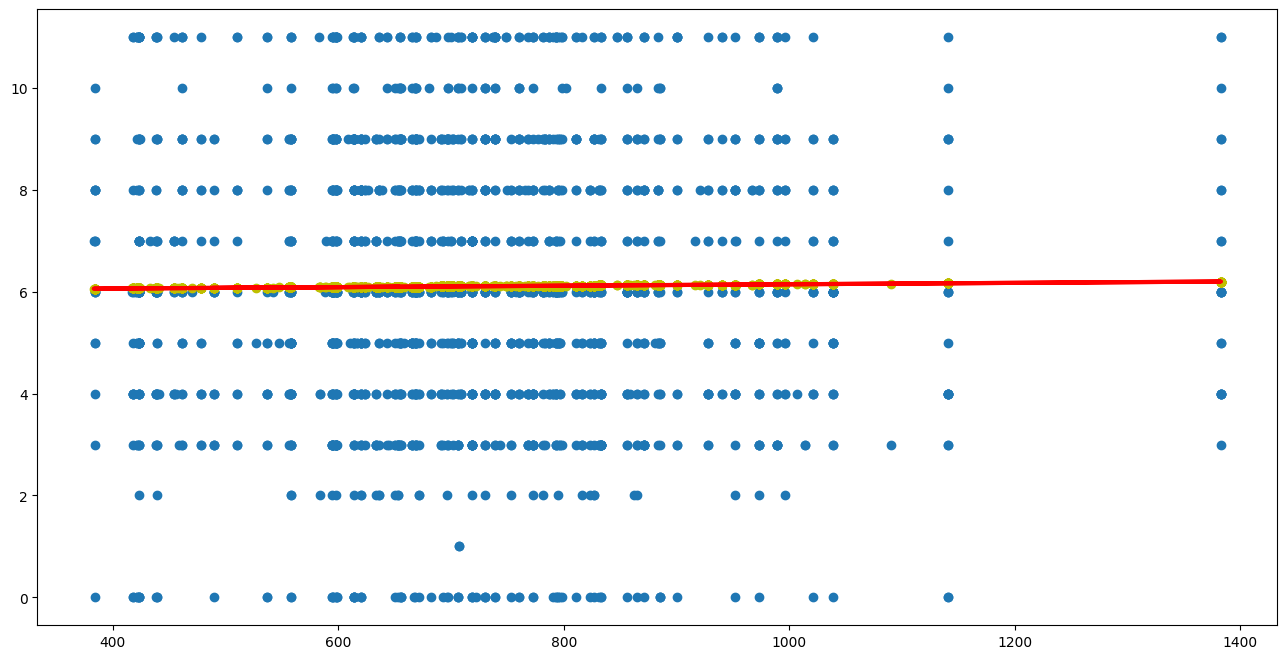

In [6]:
# Extract Response and Predictors
y = pd.DataFrame(data["Comments"])
X = pd.DataFrame(data["Caption_Length"])

# Split the Dataset into random Train and Test
# random state makes it such that every time i re run the file, the values for regression line does not change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42069)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, regline_y, color = "y")
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

##### 3.4.2 Predicting Shares using Caption Length 

Train Set : (1794, 1) (1794, 1)
Test Set  : (449, 1) (449, 1)
Intercept 	: b =  [7.27046248]
Coefficients 	: a =  [[-0.00015574]]


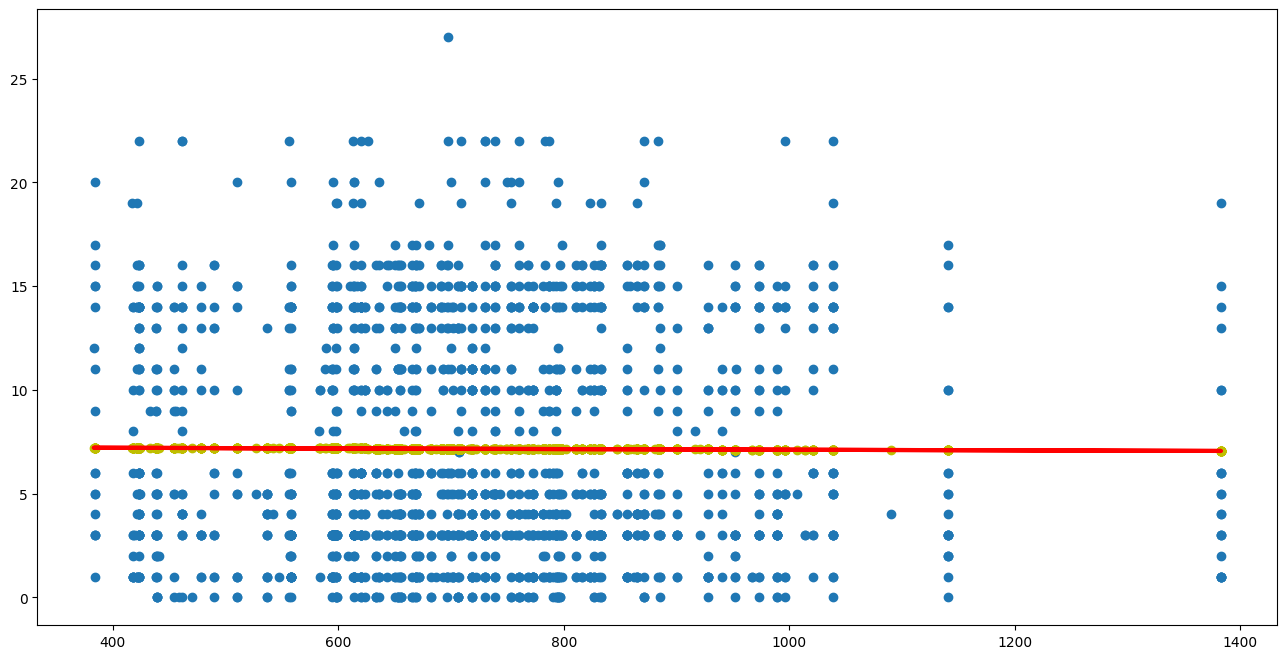

In [7]:
# Extract Response and Predictors
y = pd.DataFrame(data["Shares"])
X = pd.DataFrame(data["Caption_Length"])

# Split the Dataset into random Train and Test
# random state makes it such that every time i re run the file, the values for regression line does not change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42069)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, regline_y, color = "y")
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

##### 3.4.3 Predicting Likes using Caption Length 

Train Set : (1794, 1) (1794, 1)
Test Set  : (449, 1) (449, 1)
Intercept 	: b =  [149.00587866]
Coefficients 	: a =  [[0.00160741]]


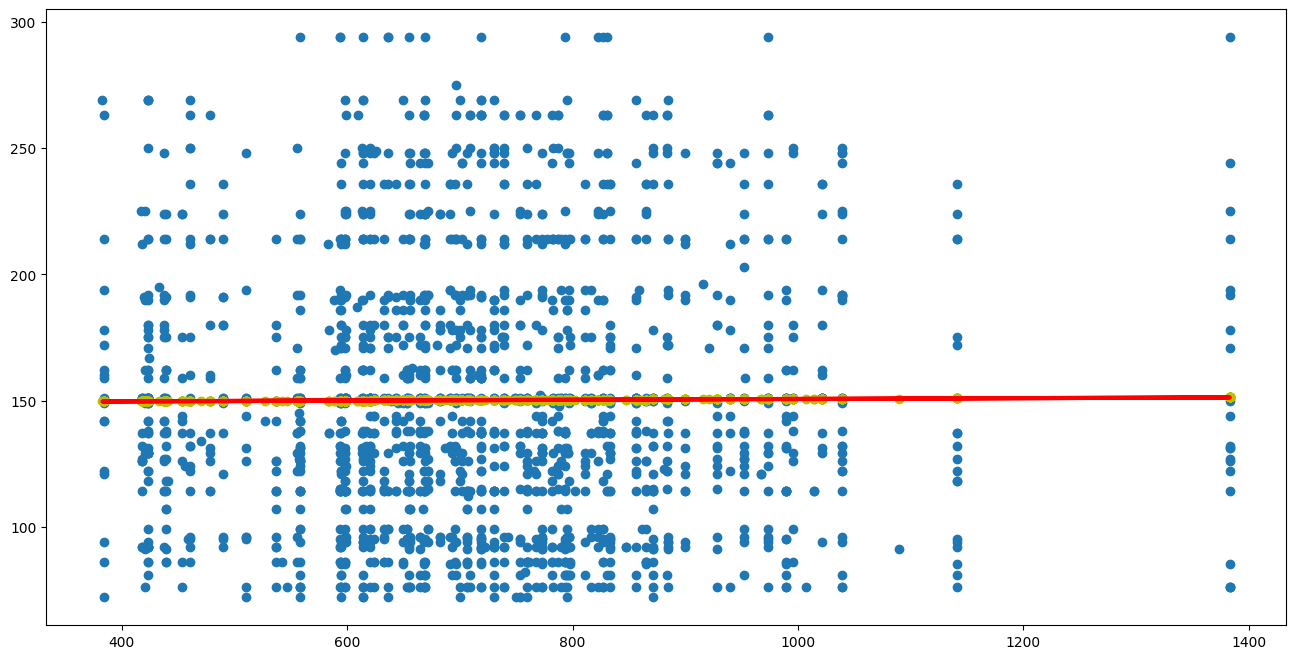

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(data["Likes"])
X = pd.DataFrame(data["Caption_Length"])

# Split the Dataset into random Train and Test
# random state makes it such that every time i re run the file, the values for regression line does not change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42069)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, regline_y, color = "y")
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

### 3.5 Instagram impression prediction model : Linear regression

##### 3.5.1 Predicting Impression using Caption Length 

Train Set : (1794, 1) (1794, 1)
Test Set  : (449, 1) (449, 1)
Intercept 	: b =  [4231.15432867]
Coefficients 	: a =  [[0.32334727]]


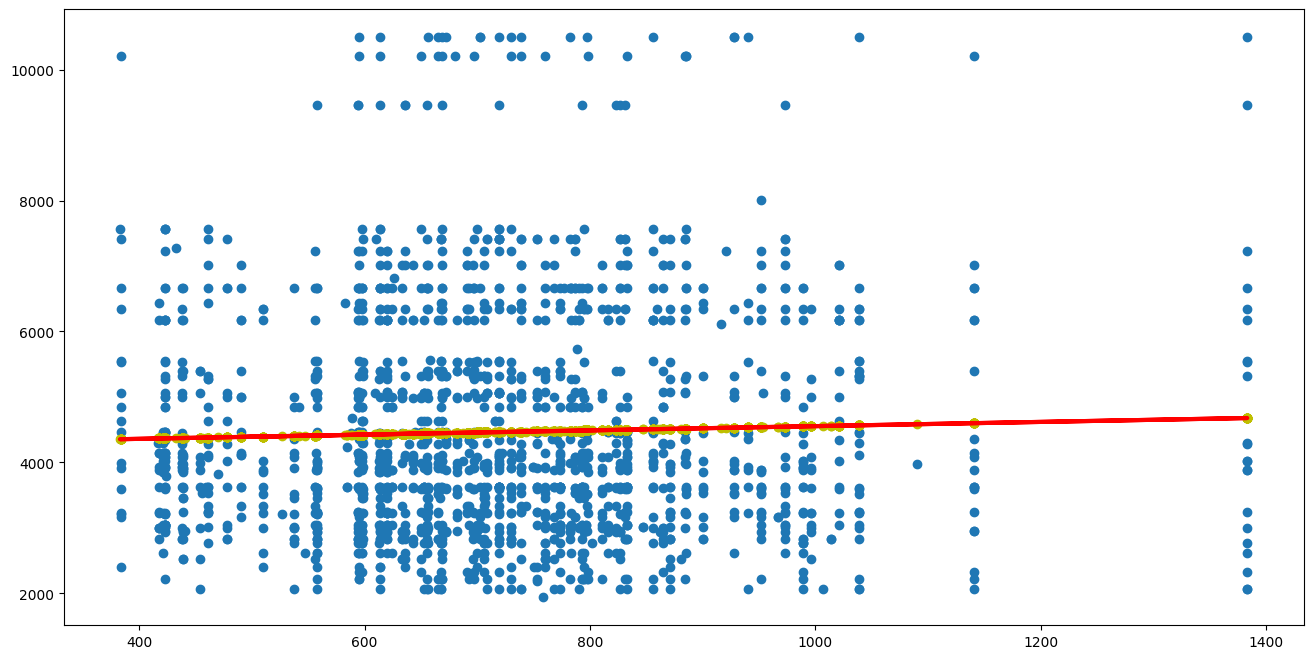

In [9]:
# Extract Response and Predictors
y = pd.DataFrame(data["Impressions"])
X = pd.DataFrame(data["Caption_Length"])

# Split the Dataset into random Train and Test
# random state makes it such that every time i re run the file, the values for regression line does not change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42069)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, regline_y, color = "y")
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [10]:
data.corr()

,Impressions,Comments,Shares,Likes,Caption_Length
Impressions,1.000000,0.334292,0.223006,0.782182,0.003507
Comments,0.334292,1.000000,0.111854,0.421072,-0.005253
Shares,0.223006,0.111854,1.000000,0.430066,-0.003113
Likes,0.782182,0.421072,0.430066,1.000000,-0.012445
Caption_Length,0.003507,-0.005253,-0.003113,-0.012445,1.000000


### 3.6 To ensure that bootstrapped did not affect our data, we performed the same steps to check for correlation of Caption_length with engagment (likes, comments, shares) and impressions

In [11]:
data_noBS = pd.read_csv("Datasets/cleaned-IG-data.csv", encoding = "utf-8",sep=",")

In [12]:
data_noBS = data_noBS.drop('Unnamed: 0', axis = 1)
data_noBS

,Impressions,Comments,Shares,Likes,Caption,Hashtags
0,3920,9,5,162,"['import', 'data', 'visual', 'everi', 'financi...","['financ', 'money', 'busi', 'invest', 'invest'..."
1,5394,7,14,224,"['best', 'data', 'scienc', 'project', 'idea', ...","['healthcar', 'health', 'covid', 'data', 'data..."
2,4021,11,1,131,"['learn', 'train', 'machin', 'learn', 'model',...","['data', 'datasci', 'dataanalysi', 'dataanalyt..."
3,4528,10,7,213,"['here', 'write', 'python', 'program', 'detect...","['python', 'pythonprogram', 'pythonproject', '..."
4,2518,5,4,123,"['plot', 'annot', 'visual', 'data', 'consid', ...","['datavisu', 'datasci', 'data', 'dataanalyt', ..."
...,...,...,...,...,...,...
114,13700,2,38,373,"['best', 'data', 'scienc', 'certif', 'choos', ...","['datasci', 'datasciencejob', 'datasciencetrai..."
115,5731,4,1,148,"['cluster', 'machin', 'learn', 'techniqu', 'us...","['machinelearn', 'machinelearningalgorithm', '..."
116,4139,0,1,92,"['cluster', 'music', 'genr', 'task', 'group', ...","['machinelearn', 'machinelearningalgorithm', '..."
117,32695,2,75,549,"['best', 'data', 'scienc', 'certif', 'choos', ...","['datasci', 'datasciencejob', 'datasciencetrai..."


In [13]:
data_noBS['Caption_Length'] = data_noBS['Caption'].apply(len)
data_noBS = data_noBS.drop(columns=['Caption','Hashtags'])
data_noBS

,Impressions,Comments,Shares,Likes,Caption_Length
0,3920,9,5,162,370
1,5394,7,14,224,411
2,4021,11,1,131,402
3,4528,10,7,213,325
4,2518,5,4,123,514
...,...,...,...,...,...
114,13700,2,38,373,326
115,5731,4,1,148,521
116,4139,0,1,92,452
117,32695,2,75,549,326


##### 3.6.1 Predicting Comments using Caption Length (non-bootstrapped)

Train Set : (95, 1) (95, 1)
Test Set  : (24, 1) (24, 1)
Intercept 	: b =  [5.42083521]
Coefficients 	: a =  [[0.00302129]]


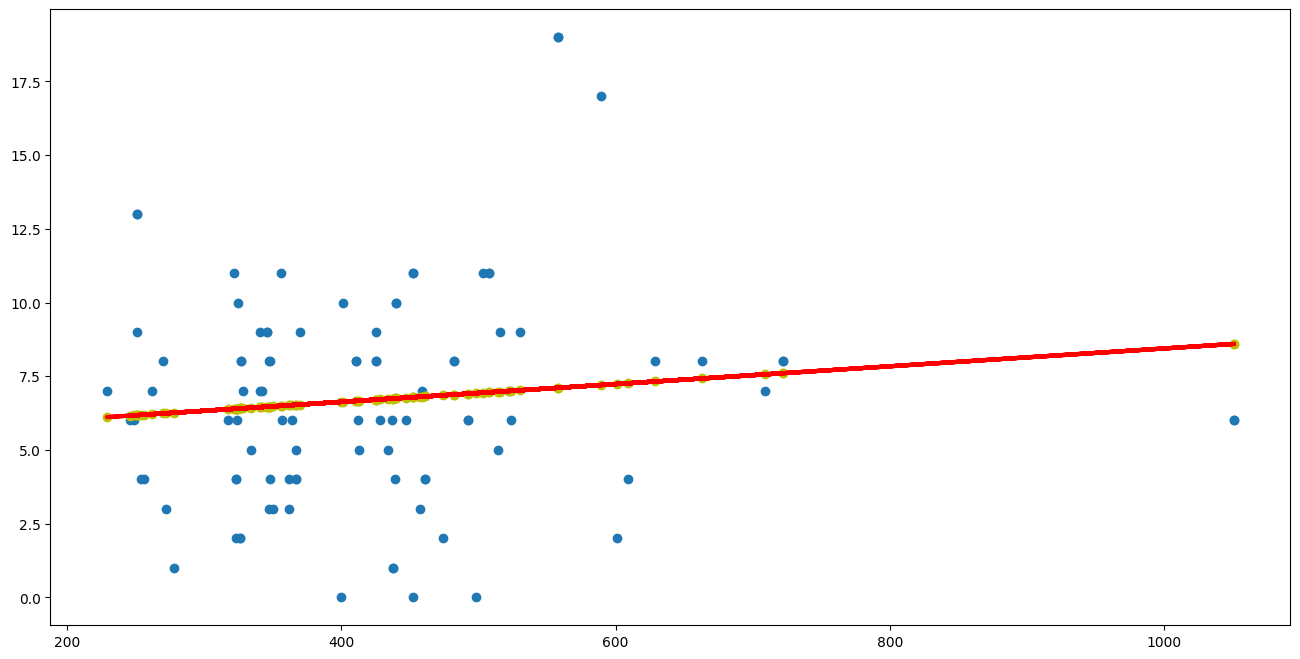

In [14]:
# Extract Response and Predictors
y = pd.DataFrame(data_noBS["Comments"])
X = pd.DataFrame(data_noBS["Caption_Length"])

# Split the Dataset into random Train and Test
# random state makes it such that every time i re run the file, the values for regression line does not change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42069)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, regline_y, color = "y")
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

##### 3.6.2 Predicting Shares using Caption Length (non-bootstrapped)

Train Set : (95, 1) (95, 1)
Test Set  : (24, 1) (24, 1)
Intercept 	: b =  [16.70968575]
Coefficients 	: a =  [[-0.01721891]]


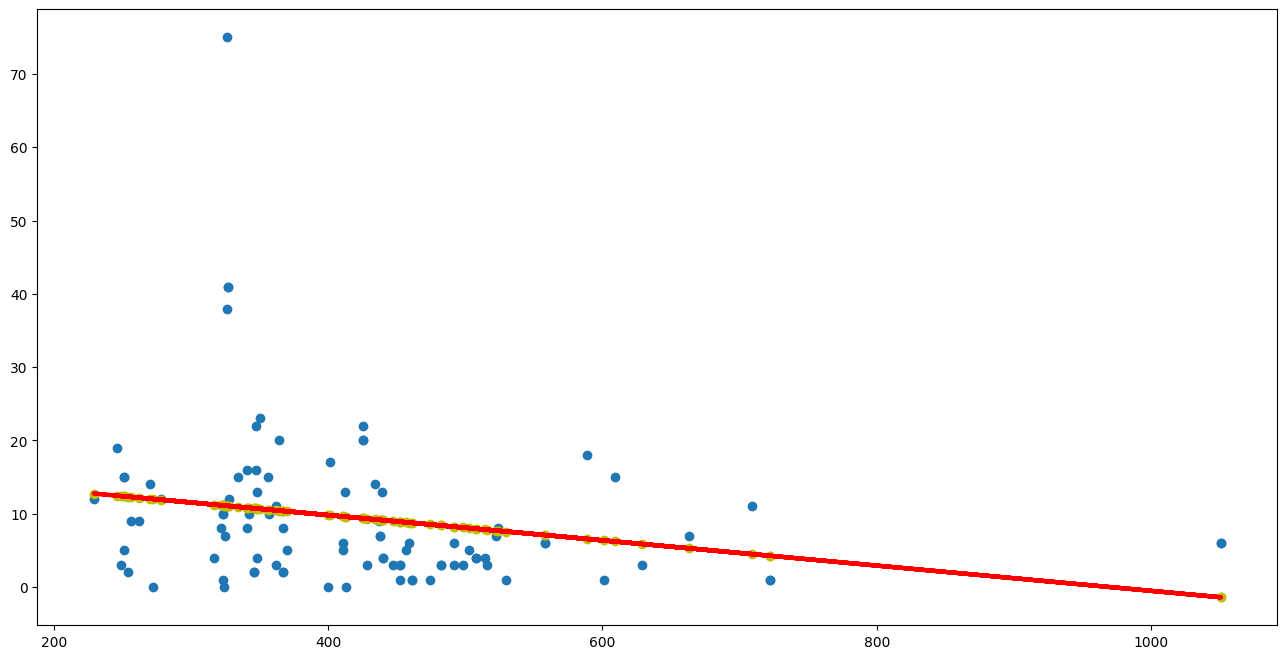

In [15]:
# Extract Response and Predictors
y = pd.DataFrame(data_noBS["Shares"])
X = pd.DataFrame(data_noBS["Caption_Length"])

# Split the Dataset into random Train and Test
# random state makes it such that every time i re run the file, the values for regression line does not change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42069)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, regline_y, color = "y")
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

##### 3.6.3 Predicting Likes using Caption Length (non-bootstrapped)

Train Set : (95, 1) (95, 1)
Test Set  : (24, 1) (24, 1)
Intercept 	: b =  [225.74823752]
Coefficients 	: a =  [[-0.11877789]]


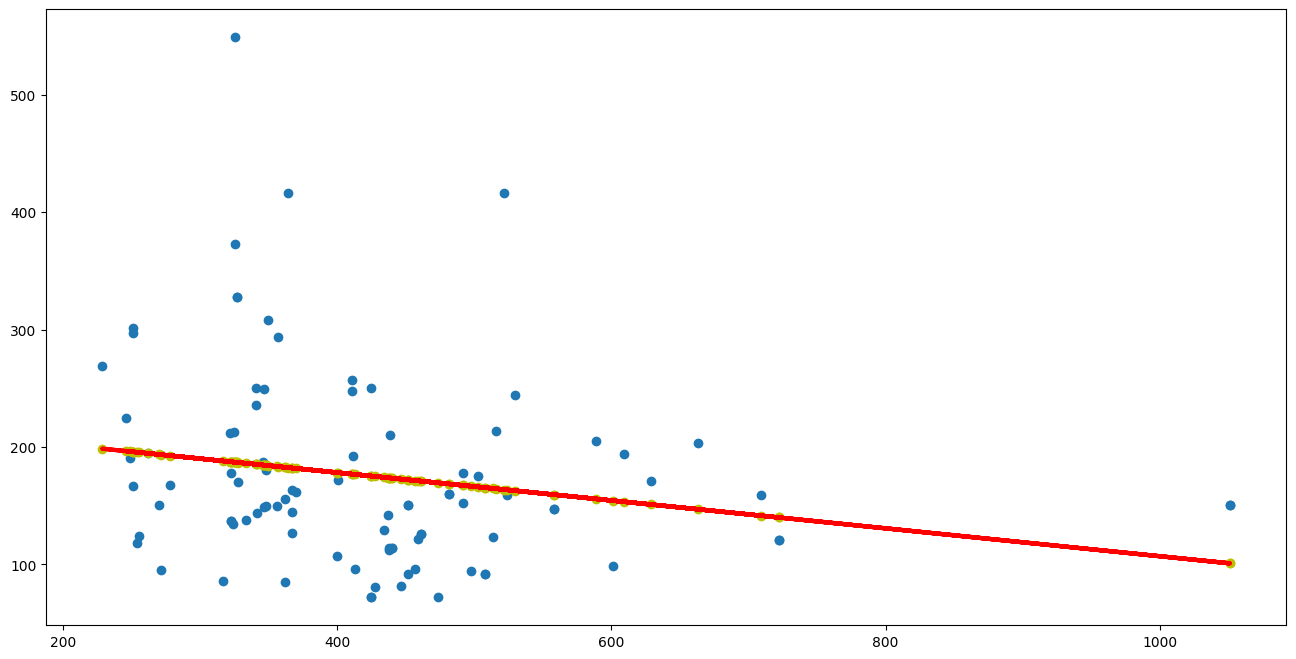

In [16]:
# Extract Response and Predictors
y = pd.DataFrame(data_noBS["Likes"])
X = pd.DataFrame(data_noBS["Caption_Length"])

# Split the Dataset into random Train and Test
# random state makes it such that every time i re run the file, the values for regression line does not change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42069)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, regline_y, color = "y")
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

##### 3.6.4 Predicting Impression using Caption Length (non-bootstrapped)

Train Set : (95, 1) (95, 1)
Test Set  : (24, 1) (24, 1)
Intercept 	: b =  [6964.64427623]
Coefficients 	: a =  [[-2.94563117]]


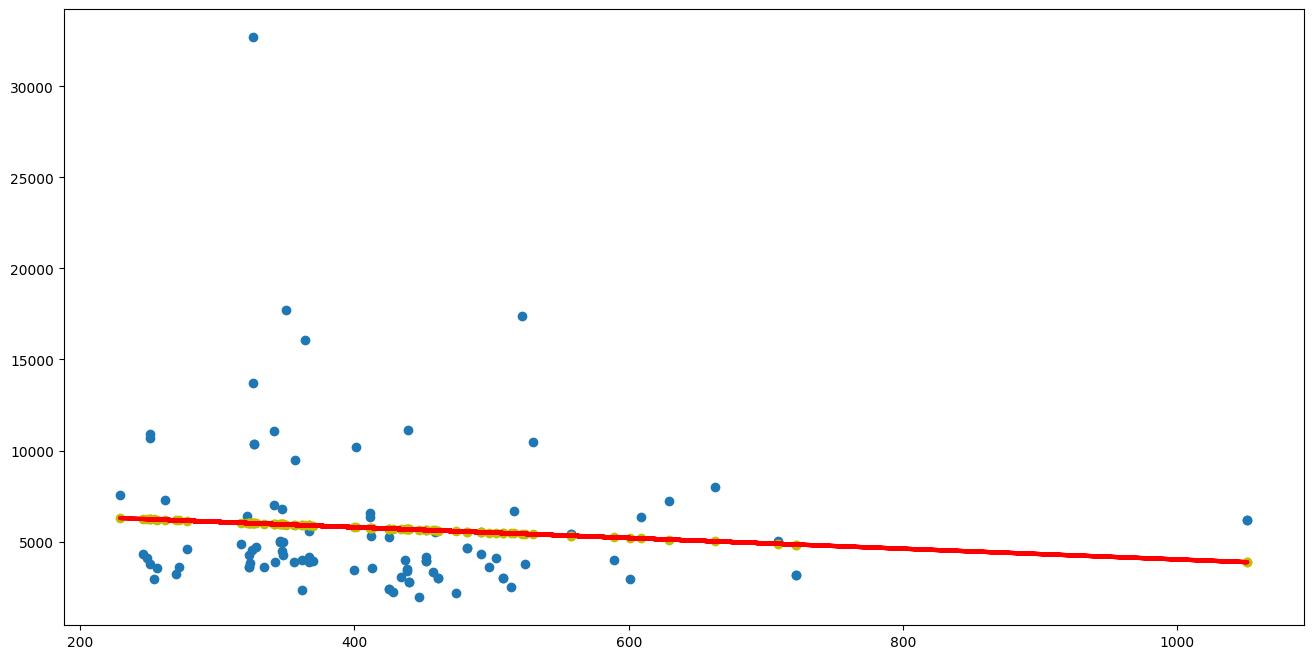

In [17]:
# Extract Response and Predictors
y = pd.DataFrame(data_noBS["Impressions"])
X = pd.DataFrame(data_noBS["Caption_Length"])

# Split the Dataset into random Train and Test
# random state makes it such that every time i re run the file, the values for regression line does not change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42069)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, regline_y, color = "y")
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [18]:
data_noBS.corr()

,Impressions,Comments,Shares,Likes,Caption_Length
Impressions,1.000000,-0.028524,0.634675,0.849835,-0.168273
Comments,-0.028524,1.000000,0.016933,0.123586,0.089358
Shares,0.634675,0.016933,1.000000,0.707794,-0.245244
Likes,0.849835,0.123586,0.707794,1.000000,-0.256124
Caption_Length,-0.168273,0.089358,-0.245244,-0.256124,1.000000


Conclusion: 

There is no correlation between Caption_Length and engagement (Likes,Comments,Shares). There is also no correlation between Caption_Length and Impressions. This lack of correlation implies that caption length may not be a useful independent variable for predicting engagement or impressions. But perhaps there could be a non-linear relationship between these variables. This is done by using the Multi-Output Regressor.

### 3.7 Multi-Output Regressor on Bootstrapped data

Mean Squared Error: 874491.1684130378


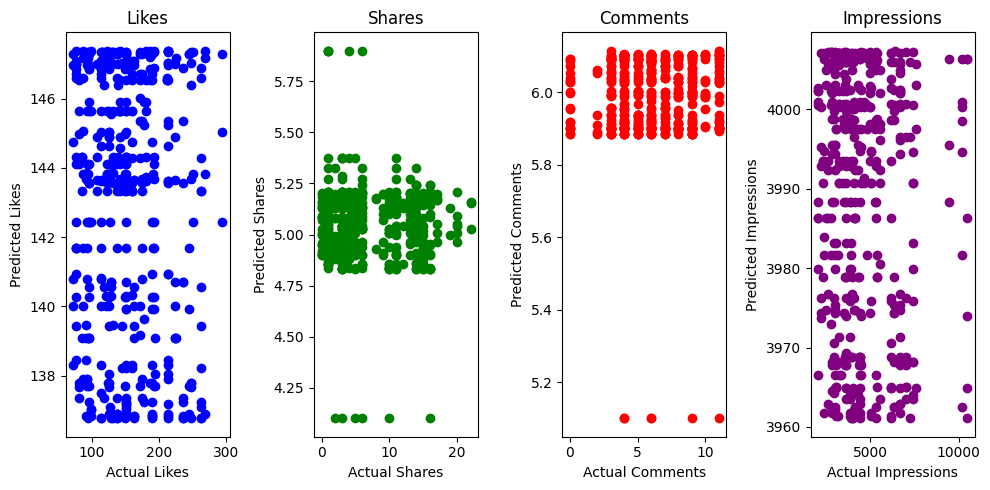

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame
X = data[['Caption_Length']]
y = data[['Likes', 'Shares', 'Comments','Impressions']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MultiOutputRegressor with Support Vector Regression as base estimator
mor = MultiOutputRegressor(SVR(kernel='rbf'))

# Fit the model
mor.fit(X_train, y_train)

# Predictions
y_pred = mor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting Likes
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.scatter(y_test['Likes'], y_pred[:, 0], color='blue')
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Likes')

# Plotting Shares
plt.subplot(1, 4, 2)
plt.scatter(y_test['Shares'], y_pred[:, 1], color='green')
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('Shares')

# Plotting Comments
plt.subplot(1, 4, 3)
plt.scatter(y_test['Comments'], y_pred[:, 2], color='red')
plt.xlabel('Actual Comments')
plt.ylabel('Predicted Comments')
plt.title('Comments')

plt.subplot(1, 4, 4)
plt.scatter(y_test['Impressions'], y_pred[:, 3], color='purple')
plt.xlabel('Actual Impressions')
plt.ylabel('Predicted Impressions')
plt.title('Impressions')


plt.tight_layout()
plt.show()


By performing multi-output regressor, we are able to fully conclude that there is no strong relation between caption length and engagement(Likes, Shares, Comments) and Impressions.

However, it is important to consider other factors that could influence engagement and impressions. Hence on the next file, we are diving into the correlation between words used in captions and Hashtags used against engagement and impressions.